In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pumpkin = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week4/US-pumpkins.csv')
pumpkin = pumpkin[pumpkin['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkin = pumpkin.drop([x for x in pumpkin.columns if x not in new_columns], axis=1)

#To calculate the average prices and covert the date to month in figure
price = (pumpkin['Low Price'] + pumpkin['High Price'])/2
month = pd.DatetimeIndex(pumpkin['Date']).month

#Creating new pumpkins dataframe with the poosible reqired columns
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkin['Package'], 'Low Price': pumpkin['Low Price'],'High Price': pumpkin['High Price'], 'Price': price})

#Normalising inconsistancies
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

price = new_pumpkins.Price
month = new_pumpkins.Month



#Explore other plots

Text(0.5, 0, 'Price')

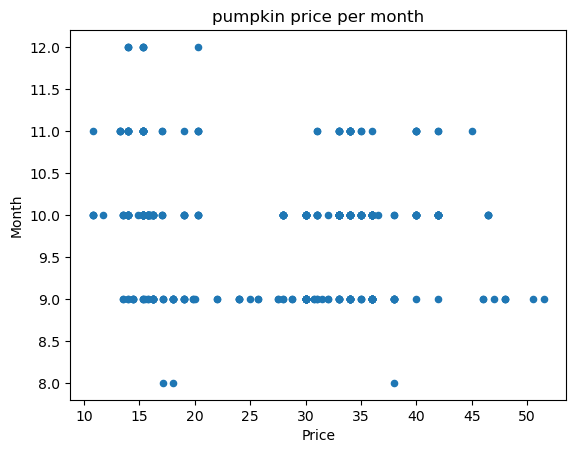

In [5]:
new_pumpkins.plot(kind='scatter',x='Price', y='Month')

plt.title('pumpkin price per month')
plt.ylabel('Month')
plt.xlabel('Price')

Text(0.5, 0, 'Month')

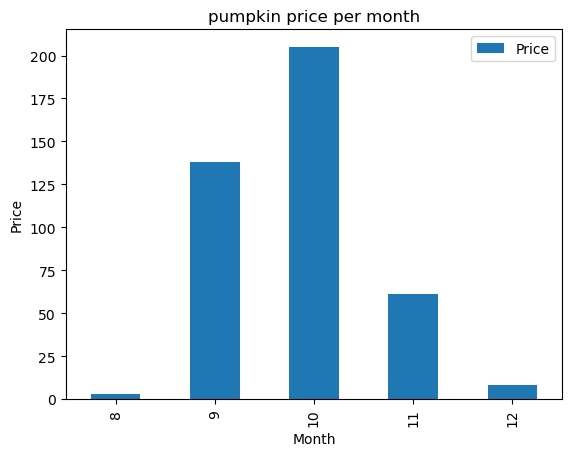

In [6]:
month_1 = new_pumpkins.groupby(['Month']).count()
month_1.plot(kind='bar', y='Price')

plt.title('pumpkin price per month')
plt.ylabel('Price')
plt.xlabel('Month')

Text(0, 0.5, 'Pumpkin Price')

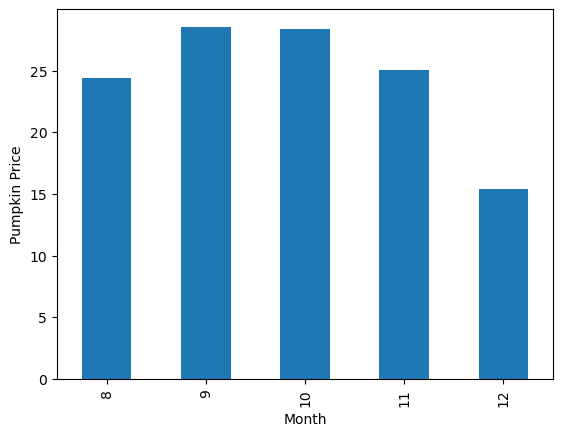

In [7]:
#Bar chart from grouping month
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

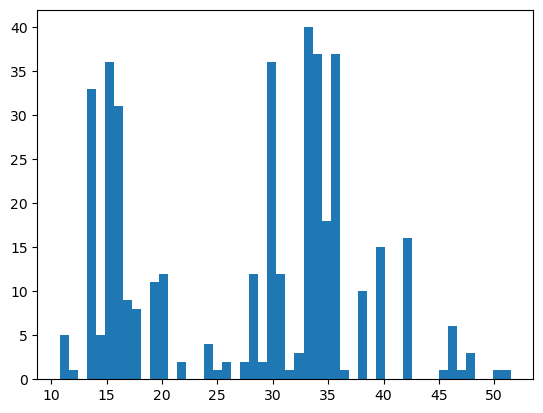

In [8]:
#Histogram
plt.hist(new_pumpkins['Price'], bins=50)
plt.show()

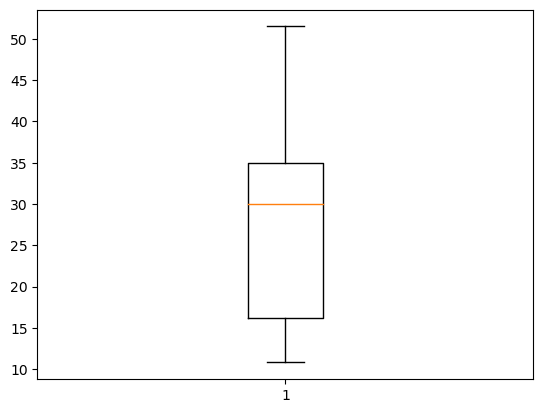

In [9]:
# create a boxplot from our data
plt.boxplot(new_pumpkins['Price'])
plt.show()

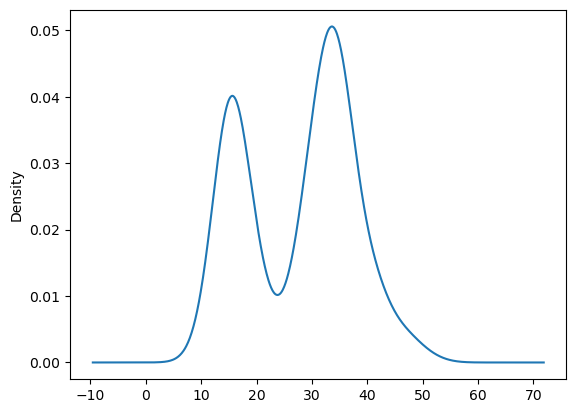

In [10]:
#Densityplot
new_pumpkins['Price'].plot(kind='density')
plt.show()

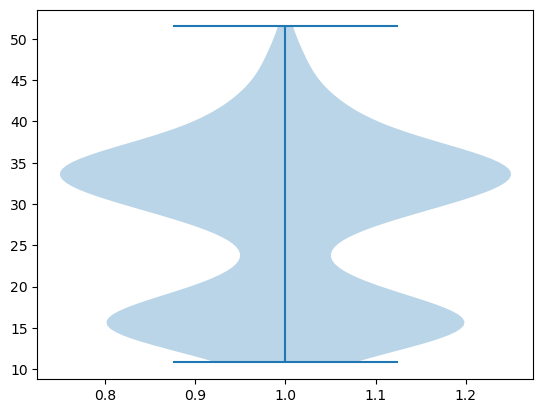

In [11]:
#ViolinPlot
plt.violinplot(new_pumpkins['Price'])
plt.show()